<h1>ShapeAI Intern Project

Employee Attrition is the inevitable departure of employees from your organization. Whether they leave on a voluntary or involuntary basis, attrition covers employee departures and all that comes with it.
The Machine Learning model uses Random Forest Algorithm to predict whether an employee is attricted or not.
The dataset from Kaggle is used https://www.kaggle.com/datasets/vjchoudhary7/hr-analytics-case-study 

Importing all the required Files

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

<h3>Understanding Dataset

It consist of three csv files

1. (general_data.csv)

-AGE Numerical Value

-ATTRITION Employee leaving the company (0=no, 1=yes)

-BUSINESS TRAVEL (1=No Travel, 2=Travel Frequently, 3=Travel Rarely)

-DEPARTMENT (1=HR, 2=R&D, 3=Sales)

-DISTANCE FROM HOME Numerical Value - THE DISTANCE FROM WORK TO HOME

-EDUCATION Numerical Value. (1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor')

-EDUCATION FIELD (1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TECHNICAL)

-COUNT Numerical Value

-EMPLOYEE ID Numerical Value

-GENDER (1=FEMALE, 2=MALE)

-JOB LEVEL Numerical Value

-JOB ROLE (1=HR REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= RESEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIVE, 9= SALES REPRESENTATIVE)

-MARITAL STATUS (1=DIVORCED, 2=MARRIED, 3=SINGLE)

-MONTHLY INCOME Numerical Value - MONTHLY SALARY

-NUMCOMPANIES WORKED Numerical Value - NO. OF COMPANIES WORKED AT

-OVER 18 (1=YES, 2=NO)

-PERCENT SALARY HIKE Numerical Value - PERCENTAGE INCREASE IN SALARY

-STANDARD HOURS Numerical Value - STANDARD HOURS

-STOCK OPTIONS LEVEL Numerical Value - STOCK OPTIONS (Higher the number, the more stock option an employee has)

-TOTAL WORKING YEARS Numerical Value - TOTAL YEARS WORKED

-TRAINING TIMES LAST YEAR Numerical Value - HOURS SPENT TRAINING

-YEARS AT COMPANY Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPANY

-YEARS SINCE LAST PROMOTION Numerical Value - LAST PROMOTION

-YEARS WITH CURRENT MANAGER Numerical Value - YEARS SPENT WITH CURRENT MANAGER

2. (employee_survey_data.csv)

-Employee ID

-Environment Satisfaction (1 'Low' 2 'Medium' 3 'High' 4 'Very High')

-Job Satisfaction (1 'Low' 2 'Medium' 3 'High' 4 'Very High')

-Work Life Balance  (1 'Bad', 2 'Good', 3 'Better', 4 'Best')

3. (manager_survey_data.csv)

-Employee ID

-Job Involvement  (1 'Low' 2 'Medium' 3 'High' 4 'Very High')

-Performance Rating ( 1 'Low', 2 'Good', 3 'Excellent', 4 'Outstanding')



Loading Three datasets using Pandas

In [88]:
df1 = pd.read_csv("../input/hr-analytics-case-study/employee_survey_data.csv")
df2 = pd.read_csv("../input/hr-analytics-case-study/general_data.csv")
df3 = pd.read_csv("../input/hr-analytics-case-study/manager_survey_data.csv")

Printing DataFrame 1

In [89]:
df1.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


Printing DataFrame 2

In [90]:
df2.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


Printing DataFrame 3

In [91]:
df3.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


Merging Dataframe 1 and 2 based on the Common Colunm 'EmployeeID'

In [92]:
df1_2 = df1.merge(df2,on ="EmployeeID", suffixes=('_left'))

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  validate=validate,


Now printing the merged Dataframe

In [93]:
df1_2.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


Similarly Merging Dataframe 1,2 and 3 based on the Common Colunm 'EmployeeID'

In [94]:
df = df1_2.merge(df3,on ="EmployeeID", suffixes=('left'))

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  validate=validate,


Finally Merged DataFrame

In [95]:
df.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,3,3


Saving it as final.csv file for further Use

In [96]:
df.to_csv('final.csv')

The shape of merged DataFrame

In [97]:
df.shape

(4410, 29)

Describing the Mathematical  and statistical Functions of All the Columns

In [98]:
pd.set_option('display.max_columns', 30)
df.describe(include='all')

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
count,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410,4410,4410,4410.000000,4410.000000,4410,4410.0,4410,4410.000000,4410,4410,4410.000000,4391.000000,4410,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
unique,NaN,NaN,NaN,NaN,NaN,2,3,3,NaN,NaN,6,NaN,2,NaN,9,3,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,No,Travel_Rarely,Research & Development,NaN,NaN,Life Sciences,NaN,Male,NaN,Sales Executive,Married,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3699,3129,2883,NaN,NaN,1818,NaN,2646,NaN,978,2019,NaN,NaN,4410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2205.500000,2.723603,2.728246,2.761436,36.923810,NaN,NaN,NaN,9.192517,2.912925,NaN,1.0,NaN,2.063946,NaN,NaN,65029.312925,2.694830,NaN,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.729932,3.153741
std,1273.201673,1.092756,1.101253,0.706245,9.133301,NaN,NaN,NaN,8.105026,1.023933,NaN,0.0,NaN,1.106689,NaN,NaN,47068.888559,2.498887,NaN,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,0.711400,0.360742
min,1.000000,1.000000,1.000000,1.000000,18.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,1.0,NaN,1.000000,NaN,NaN,10090.000000,0.000000,NaN,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,1103.250000,2.000000,2.000000,2.000000,30.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,1.0,NaN,1.000000,NaN,NaN,29110.000000,1.000000,NaN,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000
50%,2205.500000,3.000000,3.000000,3.000000,36.000000,NaN,NaN,NaN,7.000000,3.000000,NaN,1.0,NaN,2.000000,NaN,NaN,49190.000000,2.000000,NaN,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000,43.000000,NaN,NaN,NaN,14.000000,4.000000,NaN,1.0,NaN,3.000000,NaN,NaN,83800.000000,4.000000,NaN,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000


Checking the NULL value

In [99]:
df.isnull().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
dtype: int64

Replacing the NULL values based on the AVERAGE obtained from DESCRIPTION

In [100]:
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].replace(np.nan, 2.723603)
df['JobSatisfaction'] = df['JobSatisfaction'].replace(np.nan, 2.728246)
df['WorkLifeBalance'] = df['WorkLifeBalance'].replace(np.nan, 2.761436)
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].replace(np.nan, 2.694830)
df['TotalWorkingYears'] = df['TotalWorkingYears'].replace(np.nan, 11.279936)

Checking NULL values after Replacing it

In [101]:
df.isnull().sum()

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [102]:
df.to_csv('final_data_transform.csv','w')

The attrition respect to the Employee is counted

In [103]:
attrition_count = pd.DataFrame(df["Attrition"].value_counts())
print(attrition_count)

     Attrition
No        3699
Yes        711


Pie-chart for Employee Attrition

([<matplotlib.patches.Wedge at 0x7f916b6f7d90>,
 [Text(-1.0493363707830166, 0.5821453263163142, 'No'),
  Text(0.961891673217765, -0.5336332157899548, 'Yes')])

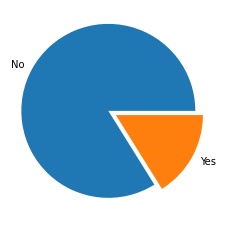

In [104]:
plt.pie(attrition_count['Attrition'], labels= ['No','Yes'] , explode = (0.1,0))

Dropping Unwanted Column

In [105]:
df.drop('EmployeeCount', axis=1, inplace=True)
df.shape

(4410, 28)

The Attrition column has Yes and No values. Its converted into Two columns by replacing 1/0

In [106]:
attrition_split = pd.get_dummies(df['Attrition'])
attrition_split.head()

,No,Yes
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


Concatinating The attrition Split data with Original Data Frame

In [107]:
df = pd.concat([df, attrition_split], axis=1)
df.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,No,Yes
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3,1,0
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4,0,1
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3,1,0
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3,1,0
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,3,3,1,0


Either Yes or No is required
So dropping out No column

In [108]:
df = df.drop(['Attrition','No'], axis=1)
df.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,Yes
0,1,3.0,4.0,2.0,51,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3,0
1,2,3.0,2.0,4.0,31,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4,1
2,3,2.0,2.0,1.0,32,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3,0
3,4,4.0,4.0,3.0,38,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3,0
4,5,4.0,1.0,3.0,32,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,3,3,0


Various Visualizations are Evaluated

<AxesSubplot:>

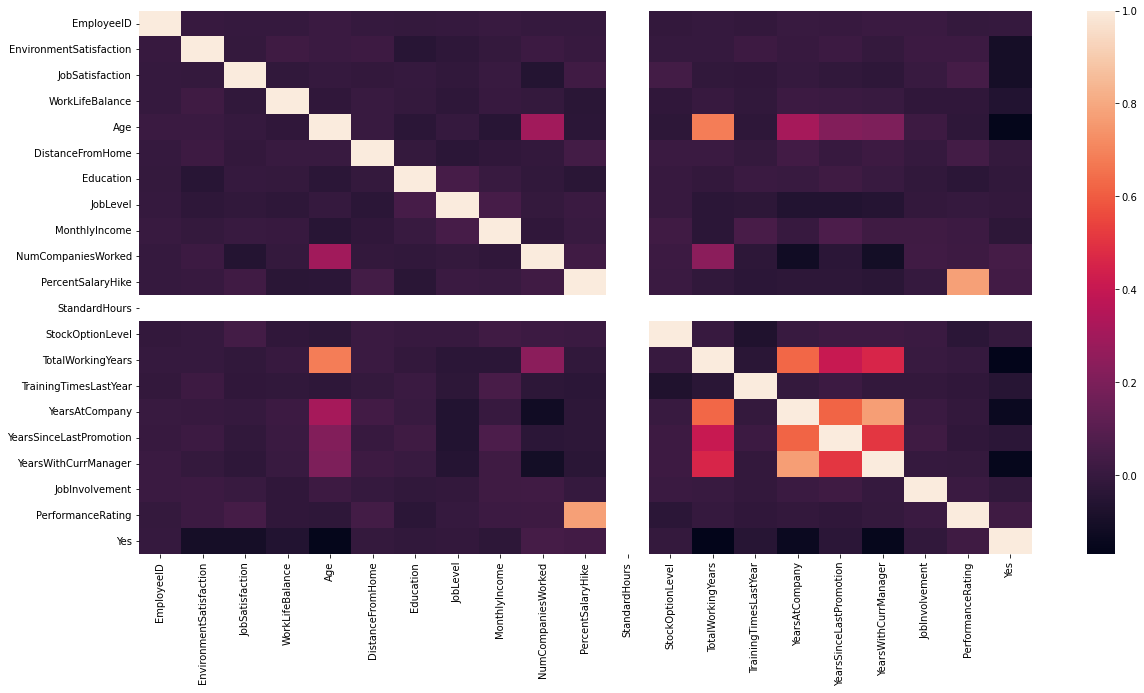

In [109]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())

<AxesSubplot:xlabel='JobLevel', ylabel='Yes'>

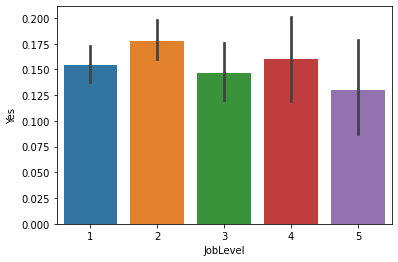

In [110]:
sns.barplot(x='JobLevel', y='Yes', data=df)

<AxesSubplot:xlabel='BusinessTravel', ylabel='Yes'>

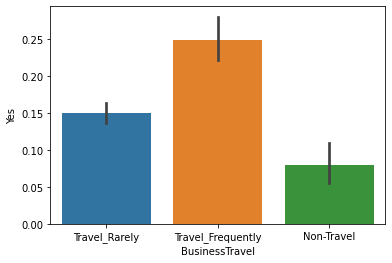

In [111]:
sns.barplot(x='BusinessTravel', y='Yes', data=df)

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='Yes'>

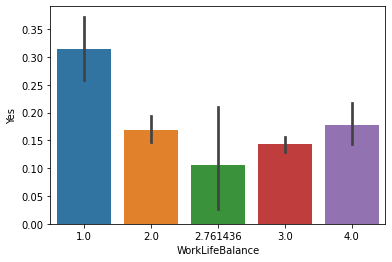

In [112]:
sns.barplot(x='WorkLifeBalance', y='Yes', data=df)

<AxesSubplot:xlabel='MaritalStatus', ylabel='Yes'>

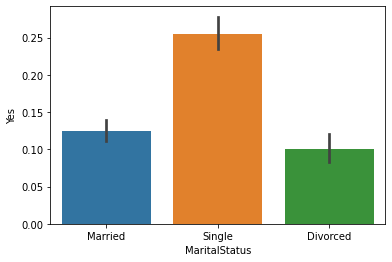

In [113]:
sns.barplot(x='MaritalStatus', y='Yes', data=df)

<AxesSubplot:xlabel='JobInvolvement', ylabel='Yes'>

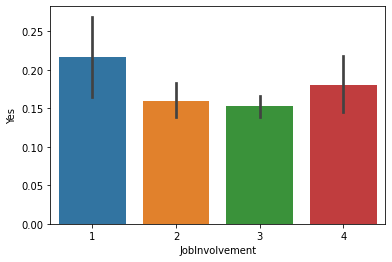

In [114]:
sns.barplot(x='JobInvolvement', y='Yes', data=df)

In [115]:
df = df.drop(['Age'],axis=1)

<h1>Fitting data in Random Forest ML Model to Predict Output




This encodes the Label values into Numerical data

Importing Label Encoder

In [116]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
  if df[column].dtype==np.number:
    continue
  else:
    df[column]=LabelEncoder().fit_transform(df[column])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


Train Test Split is imported from Sklearn.model
The Random Forest Classifier is imported

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)

X and y values are seperated

In [118]:
x = df.drop(['Yes'], axis=1)
y = df['Yes']

The training and testing dataset is splitted

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

Checking X train after splitting

In [120]:
x_train.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
1087,1087,4.0,2.0,3.0,2,2,1,0,5,1,1,2,1,29,0.0,0,14,0,1,4.0,2,3,0,2,1,1
1621,1621,1.0,3.0,3.0,1,2,9,2,2,0,1,0,0,295,2.0,0,2,0,1,19.0,0,5,0,2,1,0
1804,1804,3.0,4.0,2.0,2,1,5,3,4,1,1,3,1,844,1.0,0,3,0,0,26.0,2,26,3,0,3,0
744,744,3.0,4.0,3.0,1,1,5,3,3,0,1,5,2,821,2.0,0,4,0,1,10.0,2,2,2,2,2,0
686,686,3.0,4.0,3.0,0,1,0,2,3,1,4,7,1,773,0.0,0,2,0,0,10.0,2,9,7,5,1,0


Similarly y train

In [121]:
y_train.tail()

1033    1
3264    0
1653    0
2607    1
2732    1
Name: Yes, dtype: int64

Fitting the DATASET in RANDOM FOREST Model

In [122]:
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

Checking the scores of Training Data

In [123]:
rf.score(x_train,y_train)

0.9980563654033042

<h2>
It performs very well in Training Data Set (99.805%)

Predicting the y test data in Randomforest Model

In [124]:
pred = rf.predict(x_test)

Importing Accuracy score package to calculate the score of Prediction

In [125]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9674981103552532

<h2>
The ML Model predicts the Testing Data with high Accuracy(96.749%)

This is the Best fit model for given data